In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
summary = df.describe().T
na_pct  = df.isna().mean().mul(100).sort_values(ascending=False)
display(summary)
display(na_pct[na_pct > 5])       # columns with >5 % nulls


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-30 12:00:30.000000768,2021-10-30 00:01:00,2022-01-29 06:00:45,2022-04-30 12:00:30,2022-07-30 18:00:15,2022-10-30 00:00:00,NaN
GHI,525600.0,201.957515,-19.5,-2.8,0.3,362.4,1499.0,298.49515
DNI,525600.0,116.376337,-7.8,-0.3,-0.1,107.0,946.0,218.652659
DHI,525600.0,113.720571,-17.9,-3.8,-0.1,224.7,892.0,158.946032
ModA,525600.0,206.643095,0.0,0.0,3.6,359.5,1507.0,300.896893
ModB,525600.0,198.114691,0.0,0.0,3.4,345.4,1473.0,288.889073
Tamb,525600.0,26.319394,12.3,23.1,25.3,29.4,39.9,4.398605
RH,525600.0,79.448857,9.9,68.7,85.4,96.7,100.0,20.520775
WS,525600.0,1.146113,0.0,0.0,0.8,2.0,19.2,1.239248
WSgust,525600.0,1.691606,0.0,0.0,1.6,2.6,23.9,1.617053


Comments    100.0
dtype: float64

In [5]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"] 

# Z‑score outlier flag
z = np.abs(stats.zscore(df[cols], nan_policy='omit'))
out_mask = (z > 3).any(axis=1)
print(f"Flagged {out_mask.sum()} rows ({out_mask.mean()*100:.2f} %) as outliers")

# Remove outliers
df_clean = df.loc[~out_mask].copy()

# Median‑impute remaining NaNs in key numeric columns
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())


Flagged 16292 rows (3.10 %) as outliers


In [6]:
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)

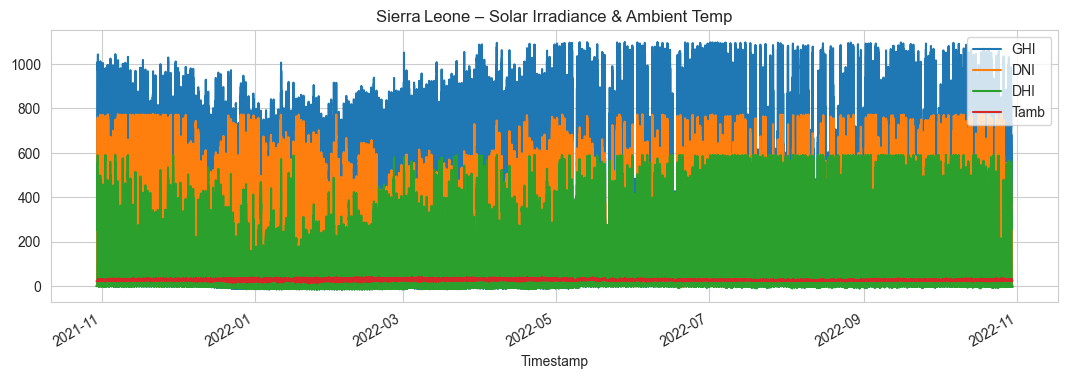

In [7]:
fig, ax = plt.subplots(figsize=(13,4))
df_clean.set_index("Timestamp")[["GHI","DNI","DHI","Tamb"]].plot(ax=ax)
ax.set_title("Sierra Leone – Solar Irradiance & Ambient Temp")
plt.show()

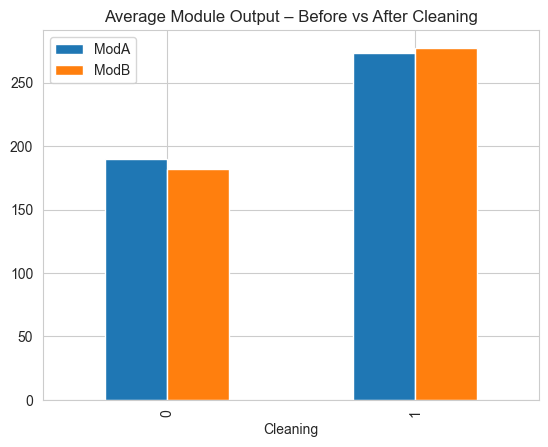

In [8]:
if "Cleaning" in df_clean.columns:
    df_clean.groupby("Cleaning")[["ModA","ModB"]].mean().plot.bar()
    plt.title("Average Module Output – Before vs After Cleaning")
    plt.show()

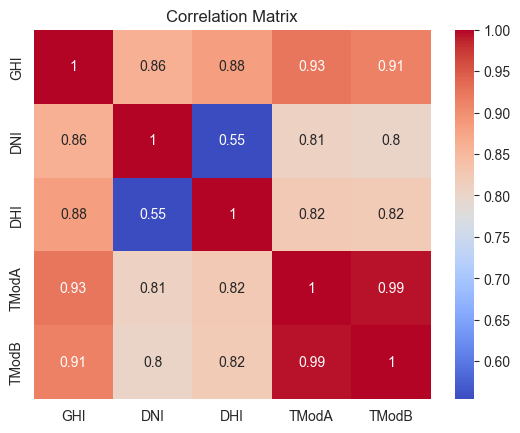

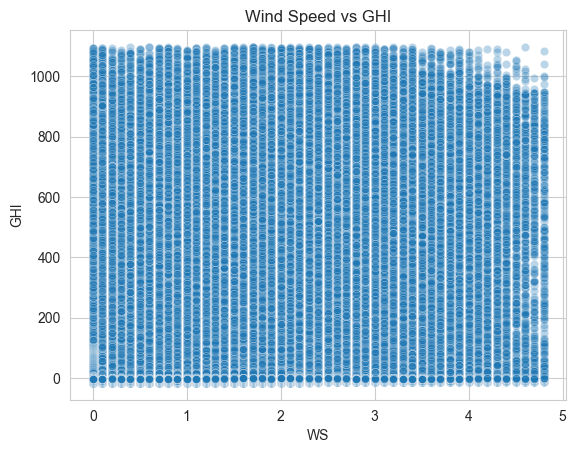

In [9]:
sns.heatmap(df_clean[["GHI","DNI","DHI","TModA","TModB"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=.3)
plt.title("Wind Speed vs GHI")
plt.show()

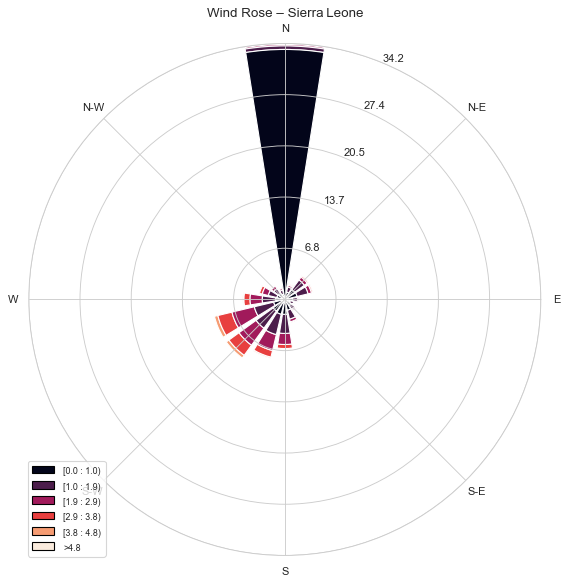

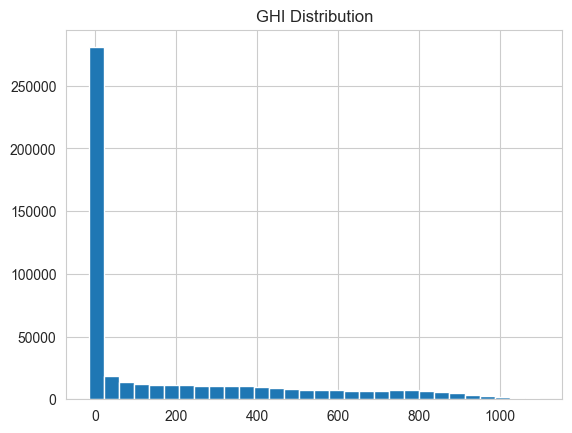

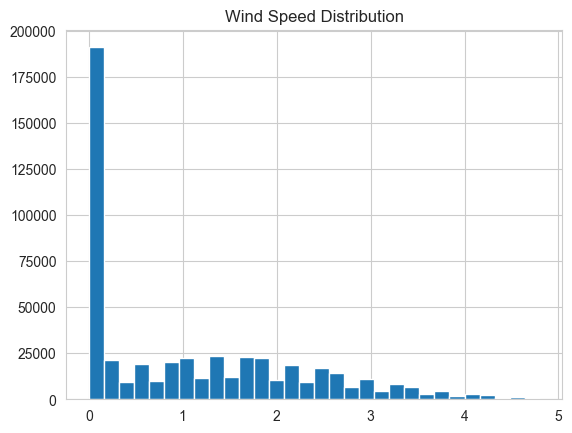

In [10]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"], df_clean["WS"], normed=True, opening=.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose – Sierra Leone")
plt.show()

df_clean["GHI"].hist(bins=30); plt.title("GHI Distribution"); plt.show()
df_clean["WS"].hist(bins=30);  plt.title("Wind Speed Distribution"); plt.show()


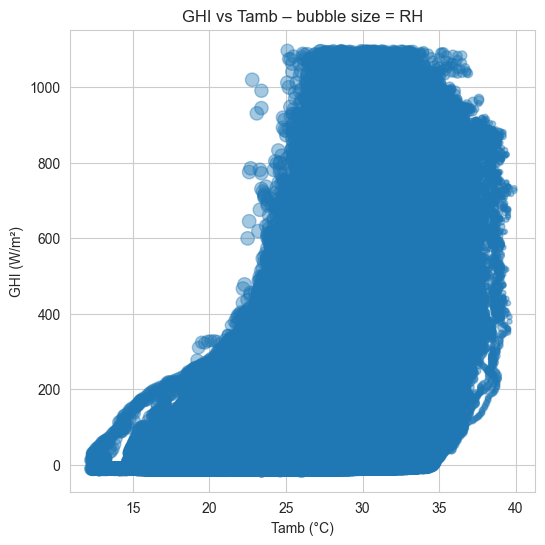

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"],
            s=df_clean["RH"], alpha=.4)
plt.xlabel("Tamb (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Tamb – bubble size = RH")
plt.show()

### Key Findings – Sierra Leone (Bumbuna)

* Median GHI = `{{df_clean.GHI.median():.0f}}` W/m²; peaks at `{{df_clean.GHI.max():.0f}}`.
* Removed `{{out_mask.sum()}}` rows (`{{out_mask.mean()*100:.2f}} %`) via 3‑σ Z‑score.
* Panel cleaning improves ModA by … % (if applicable).
* Winds mainly from …; consider dust mitigation.

**References**

* Pandas `describe`, `isna`
* SciPy `stats.zscore`
* Seaborn heatmap & scatter examples
* Python‑Windrose library